<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_013b_animate_trojan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/0.Temp/py-trojan0.99vJ_rot.csv', sep=',')

In [ ]:
df

,t,rotxS,rotyS,rotxJ,rotyJ,rotxT,rotyT
0,0.000000e+00,-7.387597e+08,-3.385104e-14,7.772612e+11,-3.385104e-14,3.882612e+11,6.737678e+11
1,3.000000e+05,-7.387598e+08,1.396984e-09,7.772613e+11,4.768372e-07,3.882951e+11,6.737480e+11
2,6.000000e+05,-7.387598e+08,2.793968e-09,7.772613e+11,9.536743e-07,3.883288e+11,6.737279e+11
3,9.000000e+05,-7.387598e+08,3.725290e-09,7.772613e+11,0.000000e+00,3.883623e+11,6.737075e+11
4,1.200000e+06,-7.387599e+08,1.117587e-08,7.772614e+11,0.000000e+00,3.883955e+11,6.736868e+11
...,...,...,...,...,...,...,...
99996,2.999880e+10,-7.387801e+08,1.190275e-03,7.772827e+11,1.220703e-03,4.726695e+10,7.803668e+11
99997,2.999910e+10,-7.387810e+08,1.202732e-03,7.772836e+11,1.220703e-03,4.732234e+10,7.804377e+11
99998,2.999940e+10,-7.387820e+08,1.215190e-03,7.772846e+11,1.190186e-03,4.737845e+10,7.805084e+11
99999,2.999970e+10,-7.387829e+08,1.227528e-03,7.772856e+11,1.220703e-03,4.743526e+10,7.805789e+11


In [ ]:
import matplotlib.animation as anim
from matplotlib.animation import PillowWriter

In [ ]:
ts = np.array(df["t"])

In [ ]:
n = len(ts)
n

100001

In [ ]:
tbound = ts[-1]
tbound

30000000000.0

In [ ]:
xA = np.array(df["rotxS"])
yA = np.array(df["rotyS"])
xB = np.array(df["rotxJ"])
yB = np.array(df["rotyJ"])
xC = np.array(df["rotxT"])
yC = np.array(df["rotyT"])

In [ ]:
type(xA)

numpy.ndarray

In [ ]:
sr = 100  # sampling rate

tss = ts[::sr]
xAs = xA[::sr]
yAs = yA[::sr]
xBs = xB[::sr]
yBs = yB[::sr]
xCs = xC[::sr]
yCs = yC[::sr]

Ns = len(tss)

In [ ]:
type(tss)

numpy.ndarray

In [ ]:
day = 24 * 60 * 60
year = 365.2422 * day
km = 1000 # 1 km = 1000 m
k = 50

def frame(n):
  # 화면 초기화: 이전 프레임 그림 청소
  ax.cla()
  nstart = np.max([0, n-k])

  # 플로팅 영역 고정
  ax.set_xlim([-.1e9, 1.1e9])
  ax.set_ylim([-.1e9, 1.1e9])

  # 제목 행: 파라미터 및 시간 정보 표시
  ax.set_title(f'Trojan object, Rot. coords. [v0 = 0.99vJ]: @ {tss[n]/year:.1f} Yrs.')

  # 격자선
  ax.grid()

  # 전체 궤적
  ax.plot(xCs[:n+1]/km, yCs[:n+1]/km, \
          color = 'blue', alpha=0.2)

  # 최근 궤적
  ax.plot(xCs[nstart:n+1]/km, yCs[nstart:n+1]/km, \
          color = 'blue', alpha=0.5)

  # 천체의 현 위치
  ax.plot(xAs[n]/km, yAs[n]/km, color = 'red', marker='o', label="Sun")
  ax.plot(xBs[n]/km, yBs[n]/km, color = 'darkgreen', marker='o', label="Jupiter")
  ax.plot(xCs[n]/km, yCs[n]/km, color = 'blue', marker='o', label="Trojan")

  # 축 라벨
  ax.set_xlabel('x [km]', fontsize = 14)
  ax.set_ylabel('y [km]', fontsize = 14)

  # 범례
  ax.legend()

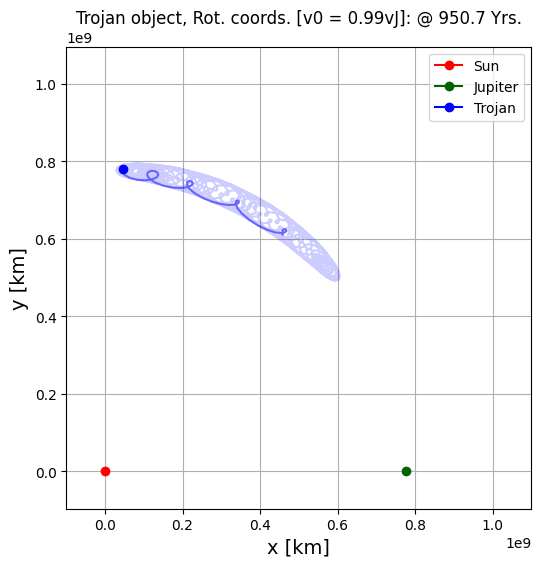

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.axis("equal")
frame(1000)

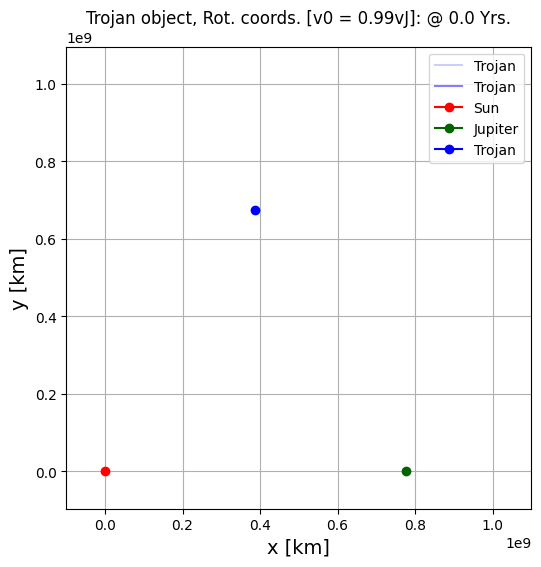

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.axis("equal")
ani = anim.FuncAnimation(fig, frame, frames=100, interval=100)

# save animation as moving GIF file
ani.save("troj0.99.gif", writer='pillow')

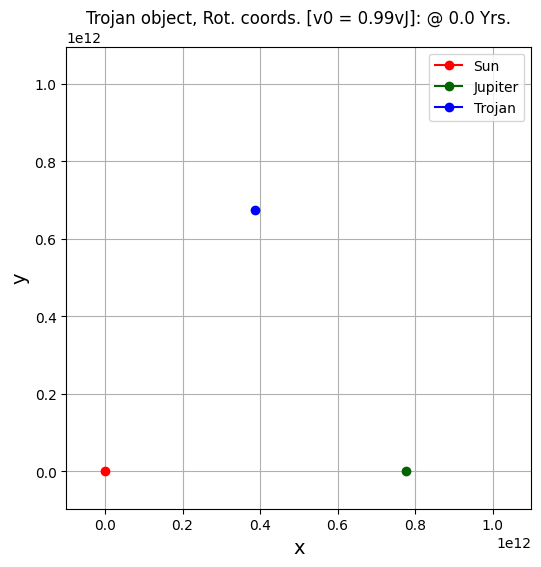

In [ ]:
# save as AVI file
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plt.axis("equal")
ani = anim.FuncAnimation(fig, frame, frames=200, interval=100)

ani.save("troj0.99.avi")